# 第7章 数据清洗与准备 

## 7.1处理缺失数据 

In [3]:
import pandas as pd
import numpy as np

In [7]:
#数值型数据pandans使用浮点值NaN来表示缺失值
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data.isnull())
string_data[0] = None
string_data.isnull() #可检测np.nan、None

0    False
1    False
2     True
3    False
dtype: bool


0     True
1    False
2     True
3    False
dtype: bool

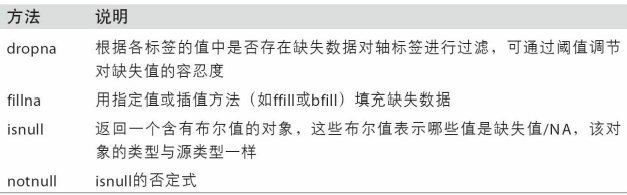

#### 滤除缺失数据 

In [22]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data.dropna())
print(data[data.notnull()])

0    1.0
2    3.5
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64


In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna() #deopna默认丢弃任何含有缺失值的行
print(data)
cleaned

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


,0,1,2
0,1.0,6.5,3.0


In [17]:
print(data.dropna(how="all")) #只丢弃全为NA的行
data[4] = NA
data.dropna(axis=1, how="all") #axis=1来对列进行操作

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
3  NaN  6.5  3.0 NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#thresh:Keep only the rows with at least many non-NA values.
#subset:Define in which columns to look for missing values
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df)
print(df.dropna())
df.dropna(thresh=2)

          0         1         2
0  0.072154       NaN       NaN
1 -0.094189       NaN       NaN
2  0.280868       NaN  0.596479
3  0.026737       NaN  0.097294
4  0.764041  0.298268  1.355793
5 -0.350796  0.497573 -0.636359
6  0.311740 -1.836106  0.180388
          0         1         2
4  0.764041  0.298268  1.355793
5 -0.350796  0.497573 -0.636359
6  0.311740 -1.836106  0.180388


,0,1,2
2,0.280868,NaN,0.596479
3,0.026737,NaN,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


#### 填充缺失数据 

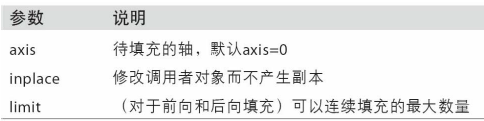

In [25]:
df.fillna({1: 0.5, 2: 0}) #1那列 填充0.5  2那列填充0

,0,1,2
0,0.072154,0.500000,0.000000
1,-0.094189,0.500000,0.000000
2,0.280868,0.500000,0.596479
3,0.026737,0.500000,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


In [27]:
_ = df.fillna(0, inplace=True) #fillna默认返回新对象，可以通过inplace对现对象进行修改
df

,0,1,2
0,0.072154,0.000000,0.000000
1,-0.094189,0.000000,0.000000
2,0.280868,0.000000,0.596479
3,0.026737,0.000000,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


In [29]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df)
#对reindexing有效的插值方法也可用于fillna
print(df.fillna(method='ffill'))
df.fillna(method='ffill', limit=2)

          0         1         2
0 -0.275687 -1.335713  0.124611
1  0.561072 -0.912460  1.302209
2 -0.308633       NaN -1.511799
3 -0.486687       NaN  0.992048
4  0.777499       NaN       NaN
5 -0.606987       NaN       NaN
          0         1         2
0 -0.275687 -1.335713  0.124611
1  0.561072 -0.912460  1.302209
2 -0.308633 -0.912460 -1.511799
3 -0.486687 -0.912460  0.992048
4  0.777499 -0.912460  0.992048
5 -0.606987 -0.912460  0.992048


,0,1,2
0,-0.275687,-1.335713,0.124611
1,0.561072,-0.912460,1.302209
2,-0.308633,-0.912460,-1.511799
3,-0.486687,-0.912460,0.992048
4,0.777499,NaN,0.992048
5,-0.606987,NaN,0.992048


In [31]:
#平均值/中位数填充
data = pd.Series([1., NA, 3.5, NA, 7])
print(data.mean())
data.fillna(data.mean())

3.8333333333333335


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64